In [7]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
df = pd.read_csv("Desktop/Iris.csv")
df.head()

,Id,SL,SW,PL,PW,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df['SL'] = df['SL'].replace([np.inf, -np.inf, -0], 0)
df['SW'] = df['SW'].replace([np.inf, -np.inf, -0], 0)
df['PL'] = df['PL'].replace([np.inf, -np.inf, -0], 0)
df['PW'] = df['PW'].replace([np.inf, -np.inf, -0], 0)

In [23]:
k_rng= range(1,10)
sse=[]
for k in k_rng:
    km = KMeans(n_clusters = k, init='k-means++', max_iter=300, n_init=10, random_state= 0)
    km.fit(df[['SL','SW', 'PL', 'PW']])
    sse.append(km.inertia_)

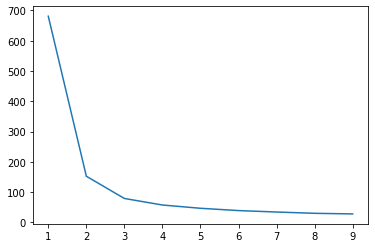

In [34]:

plt.plot(k_rng,sse)

In [25]:
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
y_predicted=km.fit_predict(df[['SL','SW','PL','PW']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [27]:
df['cluster']=y_predicted
df.head()

,Id,SL,SW,PL,PW,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [28]:
km.cluster_centers_


array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

No handles with labels found to put in legend.


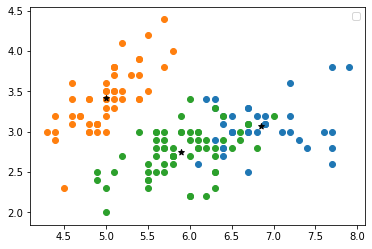

In [29]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.SL, df1.SW)
plt.scatter(df2.SL, df2.SW)
plt.scatter(df3.SL, df3.SW)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], marker='*', color='black')
plt.legend()